In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import monai
import random
%matplotlib inline

# Set the seaborn style
sns.set(style='whitegrid')

In [28]:
MET_PALETTES = dict(
    Archambault=dict(colors=("#88a0dc", "#381a61", "#7c4b73", "#ed968c", "#ab3329", "#e78429", "#f9d14a"), order=(2, 7, 5, 1, 6, 4, 3), colorblind=True),
    Austria=dict(colors=("#a40000", "#16317d", "#007e2f", "#ffcd12", "#b86092", "#721b3e", "#00b7a7"), order=(1, 2, 3, 4, 6, 5, 7), colorblind=False),
    Benedictus = dict(colors=("#9a133d", "#b93961", "#d8527c", "#f28aaa", "#f9b4c9", "#f9e0e8", "#ffffff", "#eaf3ff", "#c5daf6", "#a1c2ed", "#6996e3", "#4060c8", "#1a318b"), order=(9, 5, 11, 1, 7, 3, 13, 4, 8, 2, 12, 6, 10), colorblind=False),
    Cassatt1=dict(colors=("#b1615c", "#d88782", "#e3aba7", "#edd7d9", "#c9c9dd", "#9d9dc7", "#8282aa", "#5a5a83"), order=(3, 6, 1, 8, 4, 5, 2, 7), colorblind=True),
    Cassatt2=dict(colors=("#2d223c", "#574571", "#90719f", "#b695bc", "#dec5da", "#c1d1aa", "#7fa074", "#466c4b", "#2c4b27", "#0e2810"), order=(7, 3, 9, 1, 5, 6, 2, 10, 4, 8), colorblind=True),
    Cross=dict(colors=("#c969a1", "#ce4441", "#ee8577", "#eb7926", "#ffbb44", "#859b6c", "#62929a", "#004f63", "#122451"), order=(4, 7, 1, 8, 2, 6, 3, 5, 9), colorblind=False),
    Degas=dict(colors=("#591d06", "#96410e", "#e5a335", "#556219", "#418979", "#2b614e", "#053c29"), order=(5, 2, 1, 3, 4, 7, 6), colorblind=False),
    Demuth = dict(colors=("#591c19", "#9b332b", "#b64f32", "#d39a2d", "#f7c267", "#b9b9b8", "#8b8b99", "#5d6174", "#41485f", "#262d42"), order=(9, 5, 1, 7, 3, 4, 8, 2, 6, 10), colorblind=True),
    Derain=dict(colors=("#efc86e", "#97c684", "#6f9969", "#aab5d5", "#808fe1", "#5c66a8", "#454a74"), order=(4, 2, 5, 7, 1, 3, 6), colorblind=True),
    Egypt=dict(colors=("#dd5129", "#0f7ba2", "#43b284", "#fab255"), order=(1, 2, 3, 4), colorblind=True),
    Gauguin=dict(colors=("#b04948", "#811e18", "#9e4013", "#c88a2c", "#4c6216", "#1a472a"), order=(2, 5, 4, 3, 1, 6), colorblind=False),
    Greek=dict(colors=("#3c0d03", "#8d1c06", "#e67424", "#ed9b49", "#f5c34d"), order=(2, 3, 5, 1, 4), colorblind=True),
    Hiroshige=dict(colors=("#e76254", "#ef8a47", "#f7aa58", "#ffd06f", "#ffe6b7", "#aadce0", "#72bcd5", "#528fad", "#376795", "#1e466e"), order=(6, 2, 9, 3, 7, 5, 1, 10, 4, 8), colorblind=True),
    Hokusai1=dict(colors=("#6d2f20", "#b75347", "#df7e66", "#e09351", "#edc775", "#94b594", "#224b5e"), order=(2, 7, 4, 6, 5, 1, 3), colorblind=False),
    Hokusai2=dict(colors=("#abc9c8", "#72aeb6", "#4692b0", "#2f70a1", "#134b73", "#0a3351"), order=(5, 2, 4, 1, 6, 3), colorblind=True),
    Hokusai3=dict(colors=("#d8d97a", "#95c36e", "#74c8c3", "#5a97c1", "#295384", "#0a2e57"), order=(4, 2, 5, 3, 1, 6), colorblind=True),
    Homer1=dict(colors=("#551f00", "#a62f00", "#df7700", "#f5b642", "#fff179", "#c3f4f6", "#6ad5e8", "#32b2da"), order=(6, 3, 2, 7, 4, 8, 5, 1), colorblind=False),
    Homer2=dict(colors=("#bf3626", "#e9724c", "#e9851d", "#f9c53b", "#aeac4c", "#788f33", "#165d43"), order=(3, 7, 1, 4, 6, 2, 5), colorblind=False),
    Ingres=dict(colors=("#041d2c", "#06314e", "#18527e", "#2e77ab", "#d1b252", "#a97f2f", "#7e5522", "#472c0b"), order=(4, 5, 3, 6, 2, 7, 1, 8), colorblind=True),
    Isfahan1=dict(colors=("#4e3910", "#845d29", "#d8c29d", "#4fb6ca", "#178f92", "#175f5d", "#1d1f54"), order=(5, 2, 4, 6, 1, 7, 3), colorblind=True),
    Isfahan2=dict(colors=("#d7aca1", "#ddc000", "#79ad41", "#34b6c6", "#4063a3"), order=(4, 2, 3, 5, 1), colorblind=True),
    Java = dict(colors=("#663171", "#cf3a36", "#ea7428", "#e2998a", "#0c7156"), order=(1, 4, 2, 5, 3), colorblind=True),
    Johnson = dict(colors=("#a00e00", "#d04e00", "#f6c200", "#0086a8", "#132b69"), order=(3, 1, 4, 2, 5), colorblind=True),
    Juarez=dict(colors=("#a82203", "#208cc0", "#f1af3a", "#cf5e4e", "#637b31", "#003967"), order=(1, 2, 3, 4, 5, 6), colorblind=False),
    Kandinsky = dict(colors=("#3b7c70", "#ce9642", "#898e9f", "#3b3a3e"), order=(1, 2, 3, 4), colorblind=True),
    Klimt=dict(colors=("#df9ed4", "#c93f55", "#eacc62", "#469d76", "#3c4b99", "#924099"), order=(5, 2, 3, 4, 6, 1), colorblind=False),
    Lakota=dict(colors=("#04a3bd", "#f0be3d", "#931e18", "#da7901", "#247d3f", "#20235b"), order=(1, 2, 3, 4, 5, 6), colorblind=False),
    Manet=dict(colors=("#3b2319", "#80521c", "#d29c44", "#ebc174", "#ede2cc", "#7ec5f4", "#4585b7", "#225e92", "#183571", "#43429b", "#5e65be"), order=(8, 3, 10, 4, 7, 9, 11, 2, 6, 1, 5), colorblind=False),
    Monet=dict(colors=("#4e6d58", "#749e89", "#abccbe", "#e3cacf", "#c399a2", "#9f6e71", "#41507b", "#7d87b2", "#c2cae3"), order=(2, 5, 8, 3, 4, 9, 1, 6, 7), colorblind=False),
    Moreau=dict(colors=("#421600", "#792504", "#bc7524", "#8dadca", "#527baa", "#104839", "#082844"), order=(2, 5, 3, 4, 7, 1, 6), colorblind=False),
    Morgenstern=dict(colors=("#7c668c", "#b08ba5", "#dfbbc8", "#ffc680", "#ffb178", "#db8872", "#a56457"), order=(7, 5, 4, 6, 3, 2, 1), colorblind=True),
    Nattier=dict(colors=("#52271c", "#944839", "#c08e39", "#7f793c", "#565c33", "#184948", "#022a2a"), order=(1, 6, 3, 4, 7, 2, 5), colorblind=False),
    Navajo=dict(colors=("#660d20", "#e59a52", "#edce79", "#094568", "#e1c59a"), order=(1, 2, 3, 4, 5), colorblind=False),
    NewKingdom=dict(colors=("#e1846c", "#9eb4e0", "#e6bb9e", "#9c6849", "#735852"), order=(2, 1, 3, 4, 5), colorblind=False),
    Nizami=dict(colors=("#dd7867", "#b83326", "#c8570d", "#edb144", "#8cc8bc", "#7da7ea", "#5773c0", "#1d4497"), order=(5, 2, 6, 8, 3, 7, 4, 1), colorblind=False),
    OKeeffe1=dict(colors=("#6b200c", "#973d21", "#da6c42", "#ee956a", "#fbc2a9", "#f6f2ee", "#bad6f9", "#7db0ea", "#447fdd", "#225bb2", "#133e7e"), order=(8, 6, 1, 4, 10, 3, 11, 5, 2, 7, 9), colorblind=True),
    OKeeffe2=dict(colors=("#fbe3c2", "#f2c88f", "#ecb27d", "#e69c6b", "#d37750", "#b9563f", "#92351e"), order=(7, 1, 6, 4, 2, 5, 3), colorblind=True),
    Paquin = dict(colors=("#831818", "#c62320", "#f05b43", "#f78462", "#feac81", "#f7dea3", "#ced1af", "#98ab76", "#748f46", "#47632a", "#275024"), order=(10, 6, 1, 8, 4, 3, 5, 9, 2, 7, 11), colorblind=False),
    Peru1=dict(colors=("#b5361c", "#e35e28", "#1c9d7c", "#31c7ba", "#369cc9", "#3a507f"), order=(3, 1, 5, 2, 4, 6), colorblind=False),
    Peru2=dict(colors=("#65150b", "#961f1f", "#c0431f", "#b36c06", "#f19425", "#c59349", "#533d14"), order=(4, 1, 3, 5, 2, 7, 6), colorblind=False),
    Pillement=dict(colors=("#a9845b", "#697852", "#738e8e", "#44636f", "#2b4655", "#0f252f"), order=(4, 3, 2, 5, 1, 6), colorblind=True),
    Pissaro=dict(colors=("#134130", "#4c825d", "#8cae9e", "#8dc7dc", "#508ca7", "#1a5270", "#0e2a4d"), order=(6, 2, 4, 1, 7, 5, 3), colorblind=False),
    Redon=dict(colors=("#5b859e", "#1e395f", "#75884b", "#1e5a46", "#df8d71", "#af4f2f", "#d48f90", "#732f30", "#ab84a5", "#59385c", "#d8b847", "#b38711"), order=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), colorblind=False),
    Renoir=dict(colors=("#17154f", "#2f357c", "#6c5d9e", "#9d9cd5", "#b0799a", "#f6b3b0", "#e48171", "#bf3729", "#e69b00", "#f5bb50", "#ada43b", "#355828"), order=(2, 5, 9, 12, 3, 8, 7, 10, 4, 1, 6, 11), colorblind=False),
    Robert=dict(colors=("#11341a", "#375624", "#6ca4a0", "#487a7c", "#18505f", "#062e3d"), order=(2, 5, 3, 1, 6, 4), colorblind=False),
    Signac=dict(colors=("#fbe183", "#f4c40f", "#fe9b00", "#d8443c", "#9b3441", "#de597c", "#e87b89", "#e6a2a6", "#aa7aa1", "#9f5691", "#633372", "#1f6e9c", "#2b9b81", "#92c051"), order=(13, 3, 2, 1, 11, 5, 8, 14, 12, 10, 7, 4, 6, 9), colorblind=False),
    Stevens=dict(colors=("#042e4e", "#307d7f", "#598c4c", "#ba5c3f", "#a13213", "#470c00"), order=(4, 2, 3, 5, 1, 6), colorblind=False),
    Tam = dict(colors=("#ffd353", "#ffb242", "#ef8737", "#de4f33", "#bb292c", "#9f2d55", "#62205f", "#341648"), order=(3, 8, 1, 6, 2, 7, 4, 5), colorblind=True),
    Tara=dict(colors=("#eab1c6", "#d35e17", "#e18a1f", "#e9b109", "#829d44"), order=(1, 3, 2, 5, 4), colorblind=False),
    Thomas=dict(colors=("#b24422", "#c44d76", "#4457a5", "#13315f", "#b1a1cc", "#59386c", "#447861", "#7caf5c"), order=(3, 2, 8, 6, 1, 4, 7, 5), colorblind=False),
    Tiepolo=dict(colors=("#802417", "#c06636", "#ce9344", "#e8b960", "#646e3b", "#2b5851", "#508ea2", "#17486f"), order=(1, 2, 8, 4, 3, 5, 7, 6), colorblind=False),
    Troy=dict(colors=("#421401", "#6c1d0e", "#8b3a2b", "#c27668", "#7ba0b4", "#44728c", "#235070", "#0a2d46"), order=(2, 7, 4, 5, 1, 8, 3, 6), colorblind=True),
    Tsimshian=dict(colors=("#582310", "#aa361d", "#82c45f", "#318f49", "#0cb4bb", "#2673a3", "#473d7d"), order=(6, 1, 7, 4, 1, 5, 3), colorblind=False),
    VanGogh1=dict(colors=("#2c2d54", "#434475", "#6b6ca3", "#969bc7", "#87bcbd", "#89ab7c", "#6f9954"), order=(3, 5, 7, 4, 6, 2, 1), colorblind=False),
    VanGogh2=dict(colors=("#bd3106", "#d9700e", "#e9a00e", "#eebe04", "#5b7314", "#c3d6ce", "#89a6bb", "#454b87"), order=(1, 5, 8, 2, 7, 4, 6, 3), colorblind=False),
    VanGogh3=dict(colors=("#e7e5cc", "#c2d6a4", "#9cc184", "#669d62", "#447243", "#1f5b25", "#1e3d14", "#192813"), order=(7, 5, 1, 4, 8, 2, 3, 6), colorblind=True),
    Veronese=dict(colors=("#67322e", "#99610a", "#c38f16", "#6e948c", "#2c6b67", "#175449", "#122c43"), order=(5, 1, 7, 2, 3, 6, 4), colorblind=True),
    Wissing=dict(colors=("#4b1d0d", "#7c291e", "#ba7233", "#3a4421", "#2d5380"), order=(2, 3, 5, 4, 1), colorblind=False)
  )

COLORBLIND_PALETTES_NAMES = ("Archambault", "Cassatt1", "Cassatt2", "Demuth", "Derain", "Egypt", "Greek", "Hiroshige", "Hokusai2", "Hokusai3", "Ingres", "Isfahan1", "Isfahan2", "Java", "Johnson", "Kandinsky", "Morgenstern", "OKeeffe1", "OKeeffe2", "Pillement", "Tam", "Troy", "VanGogh3", "Veronese")
COLORBLIND_PALETTES = {name: MET_PALETTES[name] for name in COLORBLIND_PALETTES_NAMES}
EXPORT_FORMATS = {"HEX", "DEC", "REL", "XML", "IPE"}

# Data Splits Overview 🗃️

---

## **Public Training and Development Dataset (1500 cases)**
- **Purpose**: *Training and development of AI models* by participants and researchers.
- **Availability**: Open access for all, under a non-commercial CC BY-NC 4.0 license.
- **Contents**: Includes 328 cases from the ProstateX Challenge.
- **Data Source**: 
  - Imaging data: [Zenodo - DOI: 10.5281/zenodo.6624726](https://zenodo.org/record/6624726)
  - Annotations: [GitHub - DIAGNijmegen/picai_labels](https://github.com/DIAGNijmegen/picai_labels)
- **Updates/Fixes**: Check the dedicated forum post on the challenge website for more information.

---

## **Private/Sequestered Training Dataset (7607 cases)**
- **Purpose**: Retraining the top 5 AI algorithms during the Closed Testing Phase.
- **Usage**: Exclusively for organizers, for large-scale data handling.

---

## **Hidden Tuning Cohort (100 cases)**
- **Purpose**: Facilitates model selection and tuning.
- **Usage**: For the live, public leaderboard in the Open Development Phase.

---

## **Hidden Testing Cohort (1000 cases)**
- **Purpose**: 
  - To determine the top 5 AI algorithms at the end of the Open Development Phase.
  - For benchmarking AI, radiologists, and testing hypotheses at the end of the Closed Testing Phase.
- **Contents**: 
  - Internal testing data: Unseen cases from seen centers.
  - External testing data: Unseen cases from an unseen center.
- **Special Note**: 400 cases are used in the PI-CAI: Reader Study.

---

# Imaging Data Overview for PI-CAI Challenge 🏥

---

## **Dataset Composition**
- **Size**: *9,000–11,000* prostate MRI exams.
- **Sources**: 
  - **Dutch Centers**: 
    - Radboud University Medical Center (RUMC)
    - Ziekenhuis Groep Twente (ZGT)
    - University Medical Center Groningen (UMCG)
  - **Norwegian Center**: 
    - Norwegian University of Science and Technology (NTNU)
- **Ethical Considerations**: Institutional review boards waived the need for informed consent for retrospective scientific use of anonymized clinical data.

---

## **Patient Selection Criteria**
- **Patients**: Men suspected of harboring *clinically significant Prostate Cancer (csPCa)*.
- **Inclusion Criteria**: No history of treatment or prior ISUP ≥ 2 findings.
- **Clinical Variables**: Patient age, prostate volume, PSA level, PSA density.
- **Imaging Equipment**: Siemens Healthineers or Philips Medical Systems-based scanners with surface coils.

---

## **Imaging Sequences**
1. **Axial, sagittal, and coronal T2-weighted imaging (T2W)**.
2. **Axial high b-value (≥ 1000 s/mm²) diffusion-weighted imaging (DWI)**.
3. **Axial apparent diffusion coefficient maps (ADC)**.

### **Important Note on ADC Scans:**
- **Lack of Universality**: Absolute intensity values are not universally meaningful.
- **Variability Factors**: Acquisition protocols, image scaling, magnet strength, vendor, inter-patient variability.
- **References**: 
  - T.L. Chenevert et al., 2014.
  - PI-RADS v2, T. Barrett et al., 2015.

---

## **Dataset Specifics for Different Cohorts**

### *Public Training and Development Dataset & Private/Sequestered Training Dataset:*
- **Minimum Sequences**: Axial T2W, axial DWI, axial ADC.
- **Optional Sequences**: Sagittal and coronal T2W.
- **Exclusion**: No dynamic contrast-enhanced (DCE) sequences.

### *Hidden Tuning Cohort & Hidden Testing Cohort:*
- **Standard Sequences**: Axial, sagittal, and coronal T2W; axial DWI; axial ADC.
- **Special Case in Hidden Testing Cohort**: DCE sequences available only to radiologists in the PI-CAI: Reader Study, not for AI algorithms.

---

## **Further Reading on Clinical Significance of Prostate MRI Sequences**
1. "Multiparametric Magnetic Resonance Imaging for the Detection of Clinically Significant Prostate Cancer: What Urologists Need to Know. Part 1: Acquisition" by R.R.M. Engels, B. Israël, A.R. Padhani, J.O. Barentsz. DOI: 10.1016/j.eururo.2019.09.021
2. "Part 2: Interpretation" by B. Israël, M. van der Leest, M. Sedelaar, A.R. Padhani, P. Zámecnik, J.O. Barentsz. DOI: 10.1016/j.eururo.2019.10.024


In [74]:
df = pd.read_csv('Prostate_Cancer_TFM/Files/PICAI/partition_1_cv.csv')
df['mri_date'] = pd.to_datetime(df['mri_date'])

In [75]:
df

,index,patient_id,study_id,mri_date,patient_age,psa,psad,prostate_volume,histopath_type,lesion_GS,...,filepath_labelAI_cropped,filepath_seg_zones,filepath_seg_zones_cropped,PIRADS,cv_partition,Fold 0,Fold 1,Fold 2,Fold 3,Fold 4
0,353,10347,1000353,2020-07-15,58,9.8,0.17,58.0,SysBx+MRBx,"0+0,0+0",...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,1,train,test,train,train,train
1,169,10166,1000169,2019-10-09,68,4.3,0.20,21.0,NaN,NaN,...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,2,train,train,test,train,train
2,1332,11309,1001332,2012-03-04,50,7.5,0.34,22.0,MRBx,0+0,...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,1,train,test,train,train,train
3,1019,11000,1001019,2019-01-11,51,1.2,0.03,33.0,NaN,NaN,...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,2,train,train,test,train,train
4,176,10173,1000176,2016-11-25,64,28.0,NaN,37.0,SysBx,0+0,...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,2,train,train,test,train,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,1350,11327,1001350,2012-06-18,49,3.0,0.10,29.0,MRBx,"0+0,0+0",...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,3,train,train,train,test,train
1489,404,10398,1000404,2012-08-07,62,33.0,0.52,64.0,MRBx,3+4,...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,2.0,3,train,train,train,test,train
1490,349,10343,1000349,2012-08-24,67,21.9,0.23,92.0,MRBx,"3+2,N/A",...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,4,train,train,train,train,test
1491,642,10628,1000642,2019-12-06,43,3.3,NaN,53.0,NaN,NaN,...,/nvmescratch/ceib/Prostate/input/cropped/label...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/anatom...,NaN,1,train,test,train,train,train


In [56]:
def plot_histogram(dataframe, column, color=None, xlabel=None, ylabel=None, title=None, bins=10):
    if color is None:
        palette = MET_PALETTES[random.choice(COLORBLIND_PALETTES_NAMES)]
        color = palette['colors'][random.choice(range(0, len(palette['colors'])))]
    
    plt.figure(figsize=(10, 6))
    plt.hist(dataframe[column], bins=bins, edgecolor='black', color=color)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if title is not None:
        plt.title(title)
    
    plt.show()


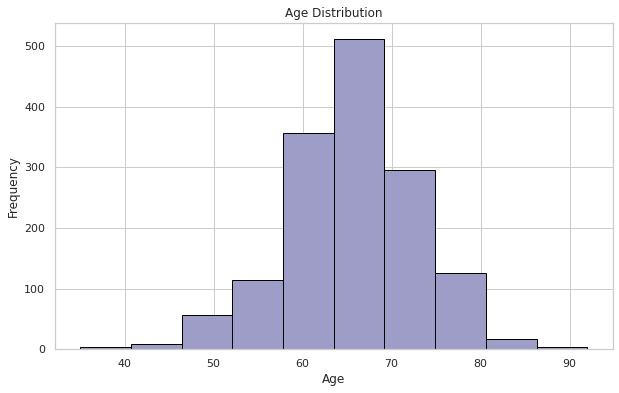

In [53]:
plot_histogram(df, 'patient_age', color=None, xlabel='Age', ylabel='Frequency', title='Age Distribution')

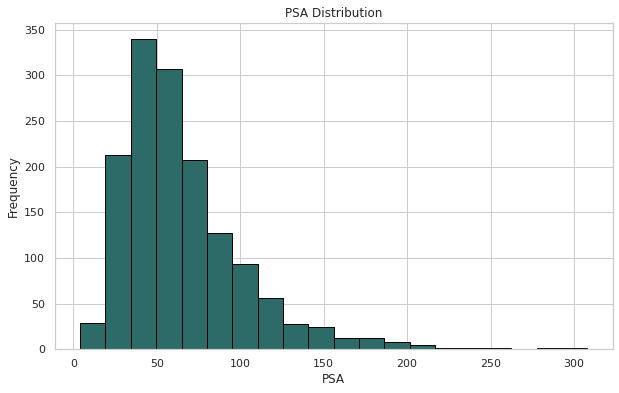

In [65]:
plot_histogram(df, 'prostate_volume', color=None, xlabel='PSA', ylabel='Frequency', title='PSA Distribution',bins=20)

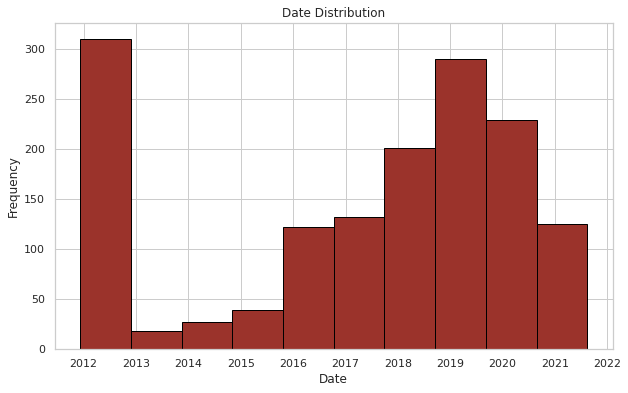

In [77]:
plot_histogram(df, 'mri_date', color=None, xlabel='Date', ylabel='Frequency', title='Date Distribution',bins=10)

In [99]:
def plot_pie_chart(dataframe, column, title=None, colors=sns.color_palette('pastel')):
    grouped_data = dataframe[column].value_counts()
    labels = grouped_data.index
    sizes = grouped_data.values
    colors = MET_PALETTES['Hokusai2']['colors']


    
    plt.figure(figsize=(10, 10))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    
    if title is not None:
        plt.title(title)
    

    plt.axis('equal')
    plt.show()


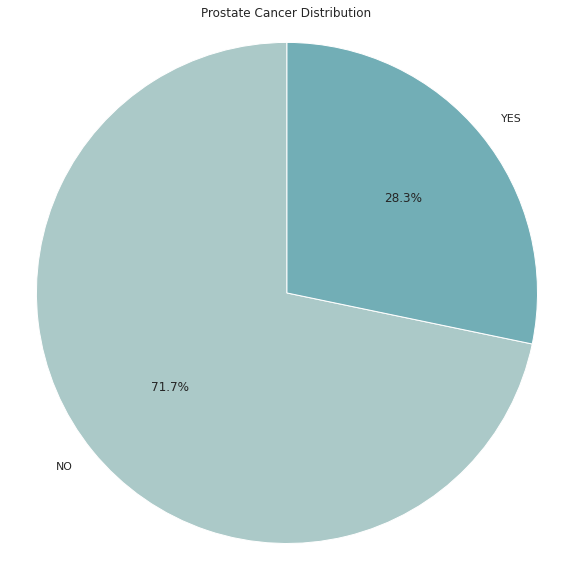

In [100]:
plot_pie_chart(df, 'case_csPCa', title='Prostate Cancer Distribution')